<a href="https://colab.research.google.com/github/dwyld/CS-522/blob/main/Clustering_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

I found a data set with all of the zip codes along with their corresponding longitude and lattitude.

In [3]:
zipcodes = pd.read_csv('/content/drive/MyDrive/cities.csv')
zipcodes.head(5)

,city,st,state,lat,lon,county,zip
0,Abbeville,AL,Alabama,31.56639,-85.25139,Henry,36310
1,Adamsville,AL,Alabama,33.59028,-86.94917,Jefferson,35005
2,Addison,AL,Alabama,34.20000,-87.17778,Winston,35540
3,Akron,AL,Alabama,32.87639,-87.74083,Hale,35441
4,Alabaster,AL,Alabama,33.23111,-86.82361,Shelby,"35007, 35114"


I will remove all information from Hawaii and Alaska per the instructions of the HW.  Before removing the data the shape of the dataframe is:

In [5]:
zipcodes.shape

(19502, 7)

In [35]:
zipcodes49 = zipcodes[zipcodes.st != 'AK']

In [36]:
zipcodes49.shape

(19353, 7)

In [37]:
zipcodes48 = zipcodes49[zipcodes49.st != 'HI']

In [38]:
zipcodes48.shape

(19352, 7)

The data frame zipcodes48 will be the dataframe we are working with the remainder of this file.  As you can see from the checking shown above, the size of the frame has changed, confirming the necessary rows have been removed.

In [22]:
import matplotlib.pyplot as plt

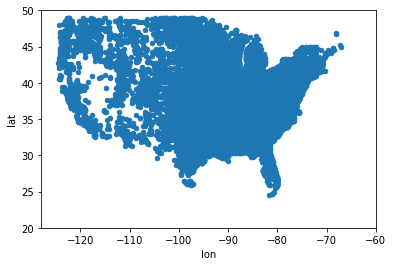

In [39]:
zipcodes48.plot(x ='lon', y='lat', kind = 'scatter')
plt.xlim(-128,-60)
plt.ylim(20,50)
plt.show()

As you can see there is a clear image of the united states created by plotting the longitude and lattitude of each zipcode.

Now I will try to use a k-means clustering algorithm with 10 clusters to try to pinpoint the top 10 cities.

In [27]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(10)

This creates 10 clusters to attempt to pinpoint the location of the most dense zipcode areas to locate the top 10 cities.

In [51]:
kmeans_df = zipcodes48[['lon', 'lat']]
kmeans_df.head()

,lon,lat
0,-85.25139,31.56639
1,-86.94917,33.59028
2,-87.17778,34.20000
3,-87.74083,32.87639
4,-86.82361,33.23111


In [55]:
kmeans.fit(kmeans_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
kmeans.cluster_centers_

array([[-8.38162806e+01,  3.28633322e+01],
       [ 5.96855898e-13, -4.54747351e-13],
       [-1.08153464e+02,  4.00592808e+01],
       [-7.60657189e+01,  4.03623500e+01],
       [-8.99941524e+01,  4.04034338e+01],
       [-9.58559983e+01,  3.36587624e+01],
       [-9.63523799e+01,  4.35499985e+01],
       [-8.33715070e+01,  4.03843483e+01],
       [-1.19316003e+02,  3.59502764e+01],
       [-1.19994208e+02,  4.59707569e+01]])

I have tried multiple implementations of kmeans algorithms, but this is the only way I could get through it with no errors.  However, this code does run all the way through, but did not work as intended as these coordinates are in the middle of the ocean and not even in the united states.  I am not sure if I did not allow for enough iterations due to the large amount of data or where I went wrong but I wanted to have at least something to turn in because I did spend a lot of time failing to even get the code to execute for the kmeans algorithm.  This means I cannot really give a top 10 cities list because my results do not help me in any way.  It was interesting to see the plot of just the zip codes to see clear places in the US where there are less zipcodes and a smaller population as the graph was more sparse in some areas in the midwest and southwest.